In [2]:
import pandas as pd #importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe=pd.read_csv("diabetes.csv") #importing/reading data

In [4]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
dataframe.isnull().sum()   #no null values hence no imputation

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# 0 will be imputed since it dosen't make sense in many coloumns

# EDA

In [15]:
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [17]:
# if two features are correlated we can drop one feature

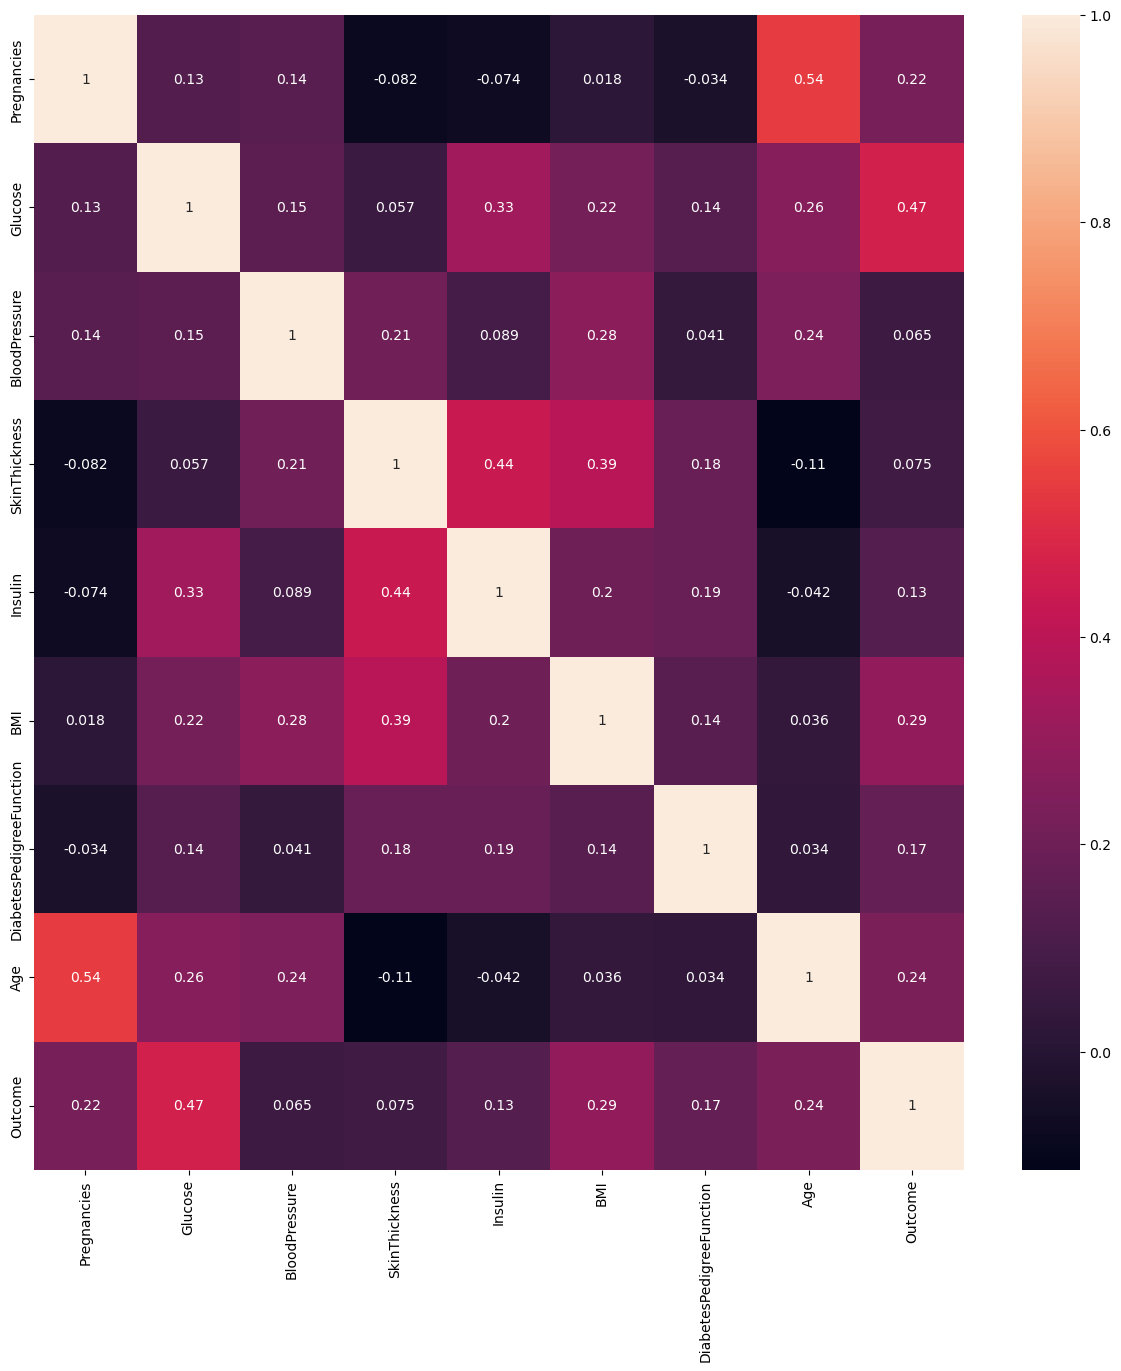

In [19]:
plt.figure(figsize=(15,15))
ax=sns.heatmap(dataframe.corr(),annot=True)  #annot will give values
plt.show()

In [21]:
# descreptive stats of given data

In [23]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# data imputation (for 0) 

In [26]:
# finding distplot of all features to figure out best way to impute(median or mean)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11092\846064991.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Pregnancies)  #median because right skewed


<Axes: xlabel='Pregnancies', ylabel='Density'>

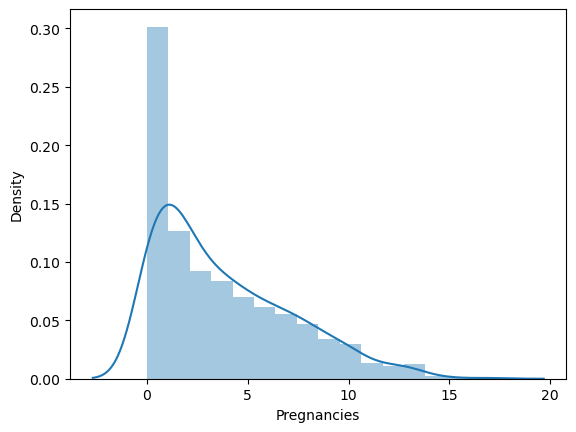

In [28]:
sns.distplot(dataframe.Pregnancies)  #median because right skewed

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11092\1752937280.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.BloodPressure) #median because left skewed


<Axes: xlabel='BloodPressure', ylabel='Density'>

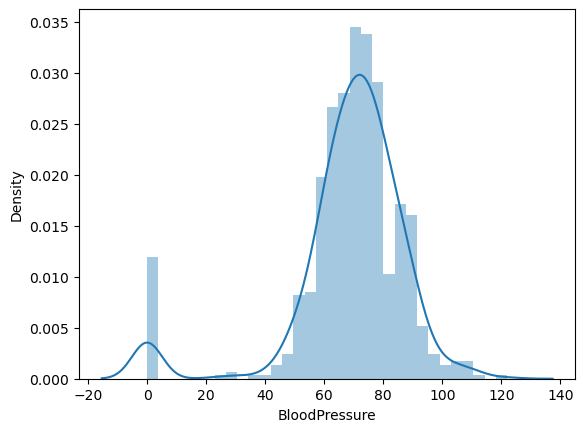

In [30]:
sns.distplot(dataframe.BloodPressure) #median because left skewed

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11092\2655743257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Insulin)  #median because right skewed


<Axes: xlabel='Insulin', ylabel='Density'>

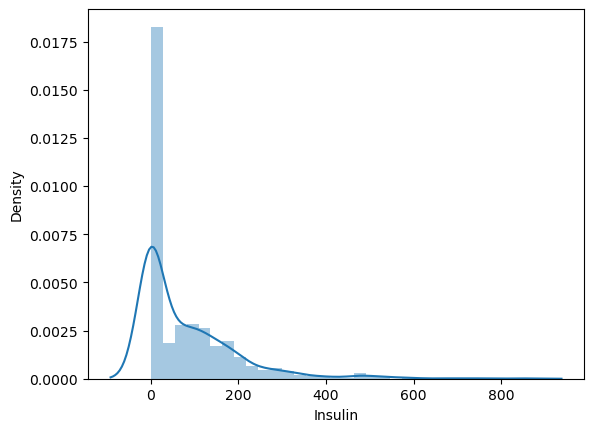

In [31]:
sns.distplot(dataframe.Insulin)  #median because right skewed

In [33]:
dataframe['Insulin']=dataframe['Insulin'].replace(0,dataframe['Insulin'].median())
dataframe['Pregnancies']=dataframe['Pregnancies'].replace(0,dataframe['Pregnancies'].median())
dataframe['Glucose']=dataframe['Glucose'].replace(0,dataframe['Glucose'].mean())
dataframe['BloodPressure']=dataframe['BloodPressure'].replace(0,dataframe['BloodPressure'].mean())
dataframe['SkinThickness']=dataframe['SkinThickness'].replace(0,dataframe['SkinThickness'].median())
dataframe['BMI']=dataframe['BMI'].replace(0,dataframe['BMI'].mean())
dataframe['DiabetesPedigreeFunction']=dataframe['DiabetesPedigreeFunction'].replace(0,dataframe['DiabetesPedigreeFunction'].median())
dataframe['Age']=dataframe['Age'].replace(0,dataframe['Age'].median())
#replacing 0 by median and mean acc. to skewness 
#(if normal distributed=mean if skewed then median)

In [36]:
dataframe.head(10) #checking database

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.600000,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.600000,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.300000,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.100000,0.167,21,0
4,3,137.0,40.000000,35,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.600000,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.300000,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,1


# outliers

In [39]:
# x=input
#y= output (outcome)

In [41]:
x=dataframe.drop(columns="Outcome")
y=dataframe["Outcome"]

In [43]:
#Box-plot for outliers

<Axes: >

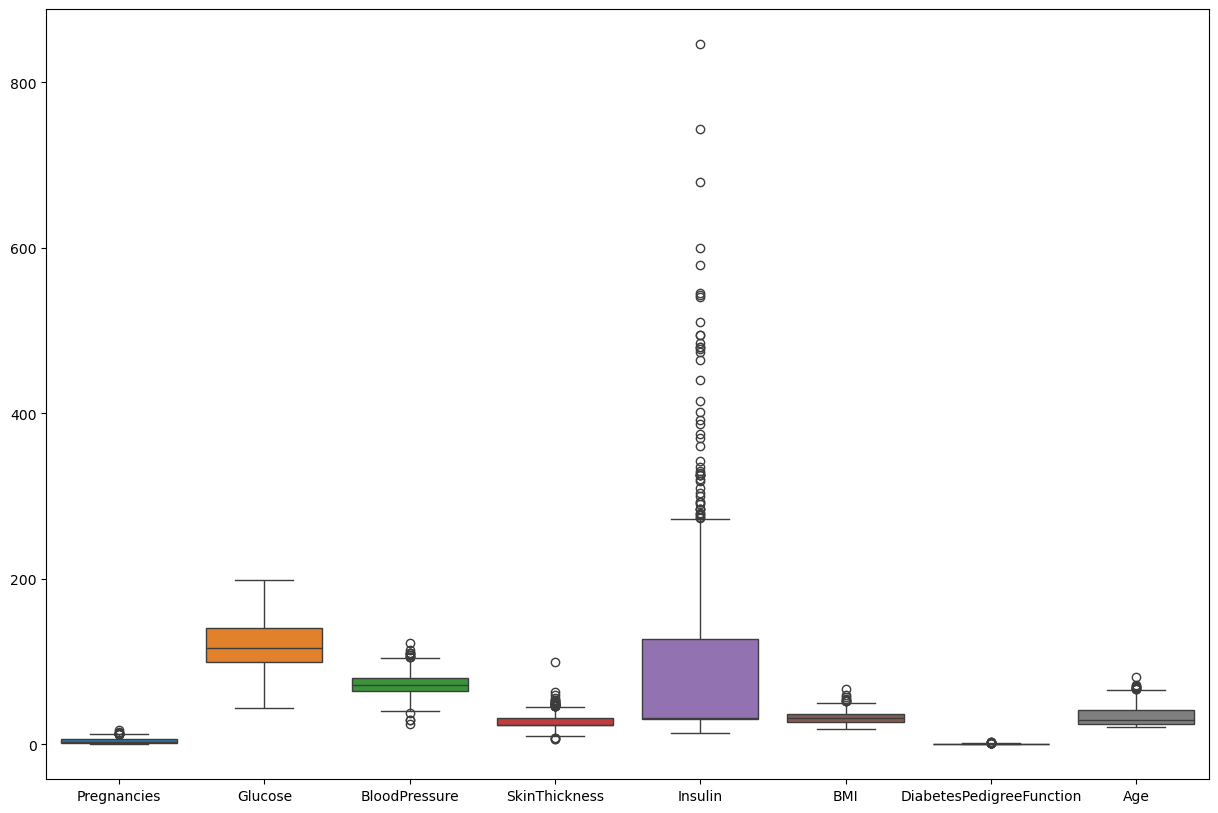

In [45]:
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=x,ax=ax)


In [47]:
# finding interquantile_Range (IQR) and finding outliers

In [49]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols:
    Q1=x[col].quantile(0.25)
    Q3=x[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    mask=(x[col]>=lower_bound) & (x[col]<=upper_bound)
    

In [51]:
x_outlier_detected=x[mask]
y_outlier_detected=y[mask]

In [53]:
x_outlier_detected.shape

(759, 8)

# standardization

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled1=scaler.fit_transform(x_outlier_detected)

<Axes: >

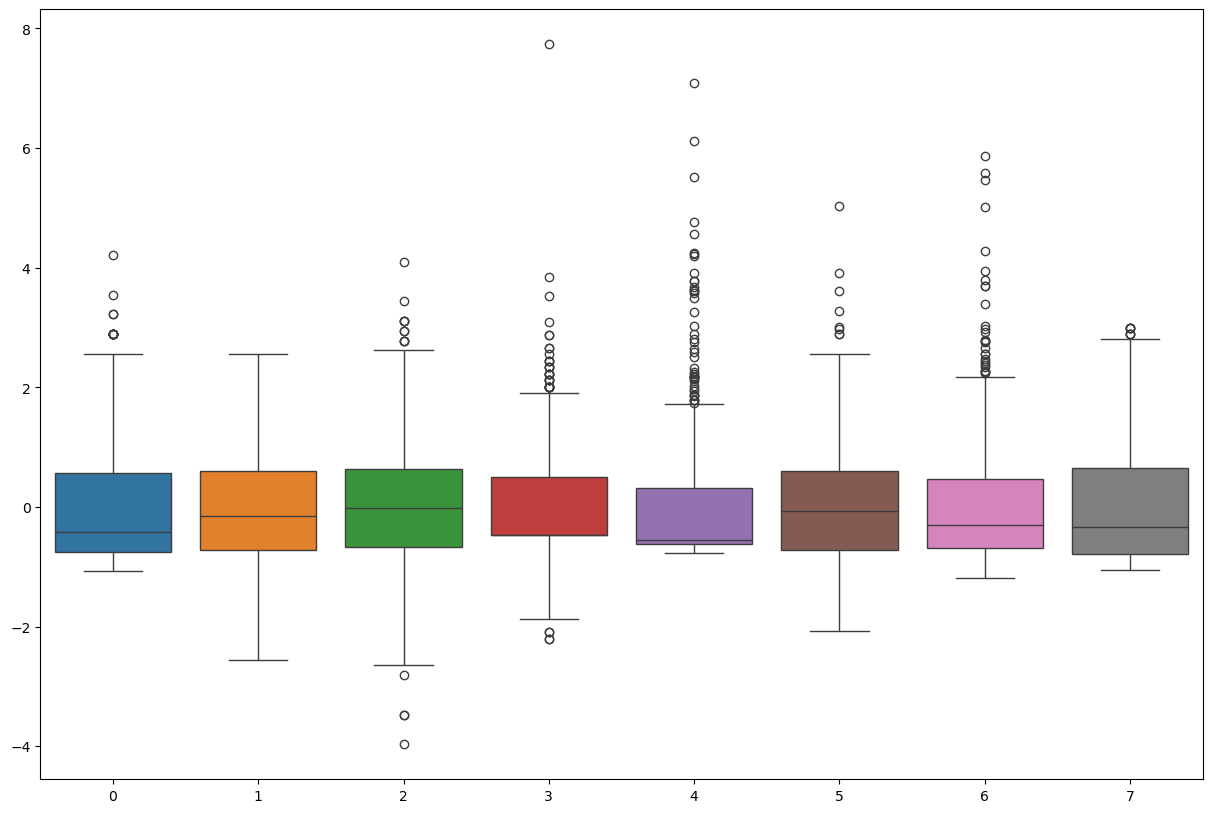

In [71]:
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=x_scaled1,ax=ax)

In [60]:
# approach 2 to find quantiles and outliers 

In [63]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [65]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [105]:
x_scaled=pd.DataFrame(x_scaled,columns=cols)
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-1.509552e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.200901e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-4.729631e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-4.729631e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,4.990017e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.734740e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00


<Axes: >

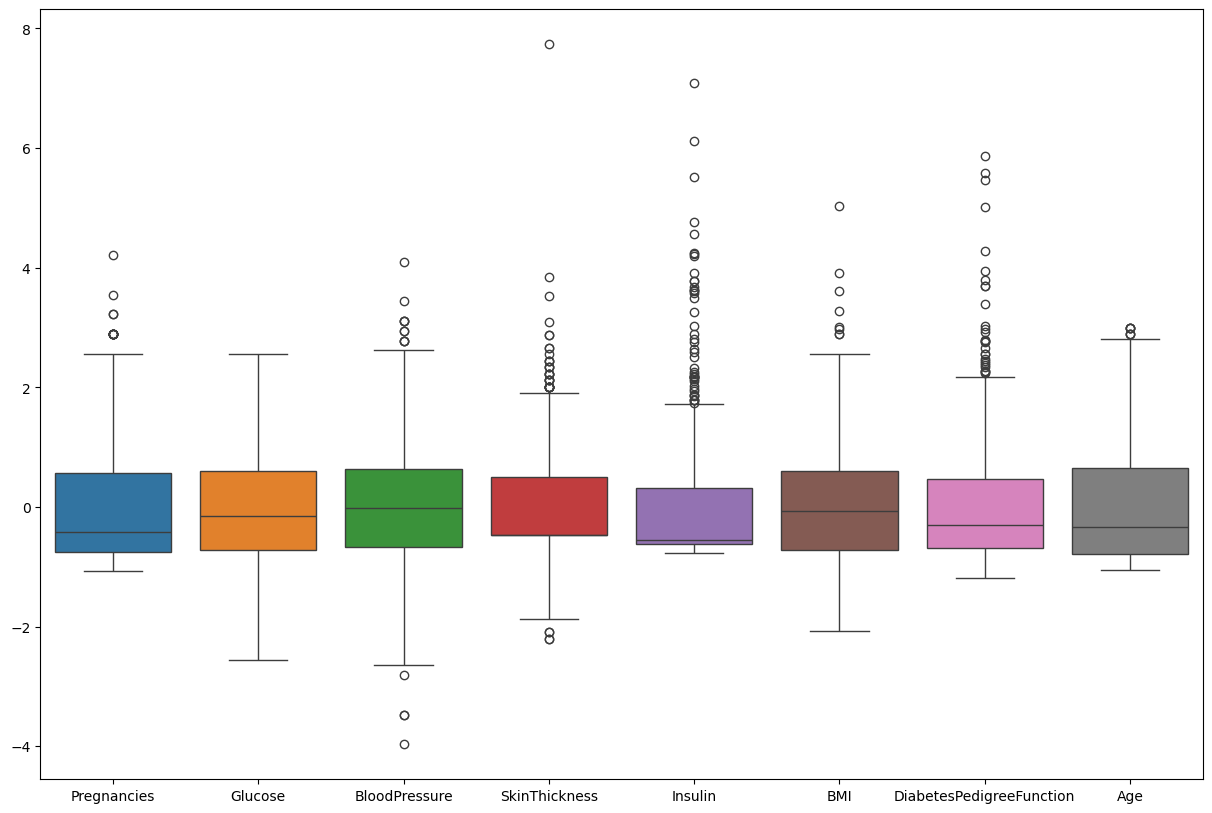

In [79]:
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=x_scaled,ax=ax)

In [101]:
# Step 1: Reset index for both
x_scaled = x_scaled.reset_index(drop=True)
y_outlier_detected = y_outlier_detected.reset_index(drop=True)

# Step 2: Create mask
q = x_scaled['Insulin'].quantile(0.95)
mask = x_scaled['Insulin'] < q

# Step 3: Apply mask safely
dataNew = x_scaled[mask]
y_outlier_detected = y_outlier_detected[mask]

# Step 4: Check the shape
dataNew.shape


(721, 8)

In [107]:
y_outlier_detected.shape

(721,)

<Axes: >

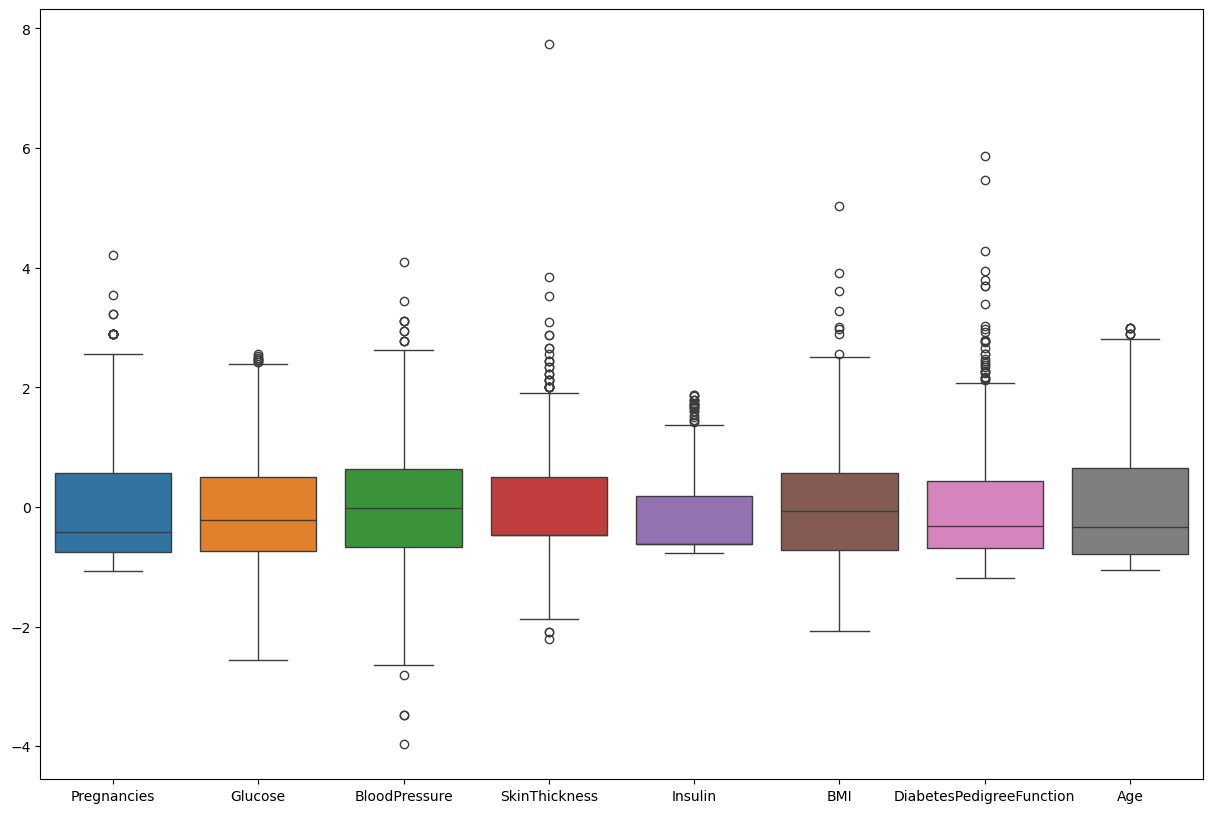

In [87]:
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=dataNew,ax=ax)

# MODEL TRAINING

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataNew,y_outlier_detected, test_size=0.33,random_state=42)

In [112]:
x_train.shape

(483, 8)

In [114]:
x_test.shape

(238, 8)

data imbalcing in output

In [119]:
y_train.value_counts() #more 0 values than 1 values in output

Outcome
0    318
1    165
Name: count, dtype: int64

In [121]:
# data imbalcing removed by
# oversampling-minority increase till majority
# undersampling-majority decreased till minority
# SMOTE- synthetic data to increase minority to majority

In [127]:
# using SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)

# checking  resampled attribution
print("Resampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())

Resampled class distribution:
Outcome
0    318
1    318
Name: count, dtype: int64


In [129]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(x_train_resampled,y_train_resampled)


LogisticRegression()

# Model Prediction

In [133]:
y_prediction=classification.predict(x_test)
print(y_prediction)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.7478991596638656

In [139]:
# recall is important here (healthcare)

In [141]:
from sklearn.metrics import classification_report
target_names=["Non Diabetic","Diabetic"]
print(classification_report(y_test,y_prediction,target_names=target_names))
              

              precision    recall  f1-score   support

Non Diabetic       0.85      0.76      0.80       159
    Diabetic       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238



In [149]:
import pickle    #saving the model

with open("Classification_model.pkl", "wb") as f:
    pickle.dump(classification, f)


In [153]:
import pickle   #importing the model and using it
with open("Classification_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
loaded_model.predict(x_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)